# Miniproyecto #3: Resultados de clasificación


**Autores:**
*   Jorge Sebastián Arroyo Estrada CC. 1193482707
*   César Augusto Montoya Ocampo CC. 1036681523

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

# Librerías

In [17]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

## Rutas

In [18]:
# Folder paths
METHODS = ["OVR", "Softmax", "SVM", "ANN"]
DB_BASE_PATH = [Path(f"./{method.lower()}_results/") for method in METHODS]

# Results filenames
file_names = [
    "DB 64×64",
    "DB 128×128",
    "DB 64×64 PCA",
    "DB 128×128 PCA",
]

# Graficar los resultados

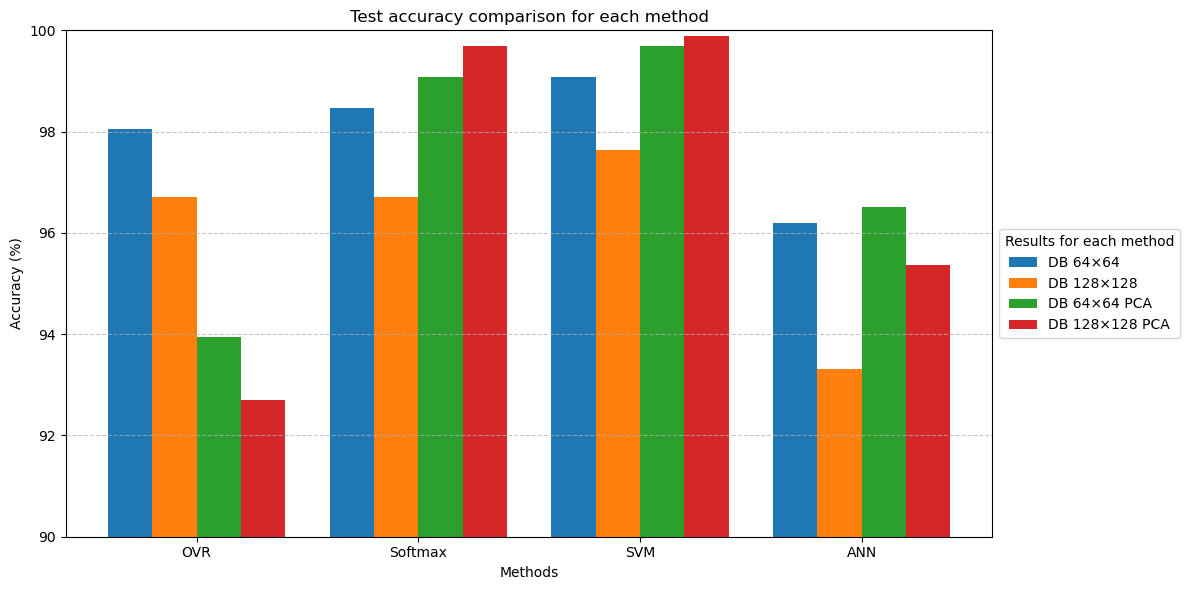

In [19]:
all_accuracies = {}
for folder in DB_BASE_PATH:
    all_accuracies[folder] = []
    for file_name in file_names:
        file_path = folder / f"{file_name}_test_results.json"
        try:
            with open(file_path, "r") as f:
                data = json.load(f)
                all_accuracies[folder].append(
                    data["accuracy"] * 100
                )
        except FileNotFoundError:
            print(f"Archivo no encontrado: {file_path}")
            all_accuracies[folder].append(
                None
            )
        except KeyError:
            print(f"El archivo {file_path} no contiene la clave 'accuracy'.")
            all_accuracies[folder].append(None)

# Extract file labels (file names without extensions) using Path
file_labels = [Path(name).stem for name in file_names]

x = np.arange(len(METHODS))
width = 0.2

plt.figure(figsize=(12, 6))
for i, label in enumerate(file_labels):
    accuracies = [all_accuracies[folder][i] for folder in DB_BASE_PATH]
    plt.bar(x + i * width, accuracies, width, label=label)

plt.xlabel("Methods")
plt.ylabel("Accuracy (%)")
plt.title("Test accuracy comparison for each method")
plt.xticks(x + width * (len(file_labels) - 1) / 2, METHODS)
plt.legend(title="Results for each method", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.ylim(90, 100)
plt.show()

# Conclusiones

1. XD
2. LOL
3. El algoritmo de máquinas de soporte vectorial típicamente utiliza el kernel RBF debido a su versatilidad para identificar patrones no lineales, sin embargo, en el caso del SVM implementado, el mejor parámetro encontrado mediante la búsqueda paramétrica usando validación cruzada para el kernel fue el lineal, lo cual indica que las características eran bastante buenas y el problema fue posible de resolver utilizando un modelo no muy complejo.
4. Para el caso de las redes neuronales, que tuvieron un rendimiento inferior a los demás métodos, podemos teorizar que le faltaron datos, ya que este tipo de modelos requiere de una gran cantidad de ellos, y en nuestra base de datos, solo habían 6000 muestras, otro factor que pudo haber influido es la elección de hiperparámetros, y es que, al haber tantas elecciones de funciones de activación y número de neuronas, a su vez las posibles combinaciones de estas, se hace inviable probarlas todas para más de 3 ó 4 capas ocultas, estos modelos tan complejos requieren grandes recursos de cómputo, en máquinas de alta eficiencia o de gran potencia de cómputo es posible realizar estas inferencias más rápidamente, y suelen dar buenos resultados para problemas complejos.